# Music Analysis

### Setup
- Pandas
- Matplotlib
- Seaborn
- Seaborn Default Theme

In [1712]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Question 1
Combine all of the CSV files into a single dataset using Pandas. It should be held in a variable called "all_top_songs".

### Strategy
- Import all 10 csv files
- Concatenate them into a single csv file
- Preserve the index
- Use a loop to avoid repetition

In [1713]:
all_top_songs = pd.concat([pd.read_csv(f'data/{year}.csv', index_col=0) for year in range(2010, 2020)], ignore_index=False)
all_top_songs.head()

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78


## Question 2
Clean the dataset to make sure the following columns are either integer or floats and not objects:
- id
- year
- bpm
- nrgy
- dnce
- db
- live
- val
- dur
- acous
- spch
- pop

In [1714]:
all_top_songs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 603 entries, 1 to 603
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   title      603 non-null    object
 1   artist     603 non-null    object
 2   top genre  603 non-null    object
 3   year       603 non-null    int64 
 4   bpm        603 non-null    int64 
 5   nrgy       603 non-null    int64 
 6   dnce       603 non-null    int64 
 7   dB         603 non-null    int64 
 8   live       603 non-null    int64 
 9   val        603 non-null    int64 
 10  dur        603 non-null    int64 
 11  acous      603 non-null    int64 
 12  spch       603 non-null    int64 
 13  pop        603 non-null    int64 
dtypes: int64(11), object(3)
memory usage: 70.7+ KB


Answer: 

All required columns are Integers.

## Question 3
What is the most popular song in the dataset?

### Strategy:

- Sort 'all_top_songs' by the 'pop' column by descending order.
- Find the highest popularity score.
- Select all songs with the highest score (in case of ties).

In [1715]:
# Calculation
sorted_songs = all_top_songs.sort_values(by='pop', ascending=False)
max_pop = sorted_songs['pop'].iloc[0]
most_popular_songs = sorted_songs[sorted_songs['pop'] == max_pop]

# Answer
if len(most_popular_songs) > 1:
    tied_songs = (most_popular_songs['title'] + ' by ' + most_popular_songs['artist']).tolist()
    print(f"\nAnswer:\n\nThe most popular songs in the dataset are: {', '.join(tied_songs)}.")
else:
    most_popular = most_popular_songs.iloc[0]
    print(f"\nAnswer:\n\nThe most popular song in the dataset is {most_popular['title']} by {most_popular['artist']}.")


Answer:

The most popular song in the dataset is Memories by Maroon 5.


## Question 4
What artist has the most songs in the dataset?

### Strategy:
- Count the number of songs per artist in descending order.
- Identify the artist(s) with the highest song count.
- Check for ties.

In [1716]:
# Calculation
artist_counts = all_top_songs['artist'].value_counts()
top_artists = artist_counts.head(1).index.tolist()

# Answer
if len(top_artists) > 1:
    print(f"\nAnswer:\n\nThe artists with the most songs are: {', '.join(top_artists)}.")
else:
    print(f"\nAnswer:\n\nThe artist with the most songs is {top_artists[0]}.")


Answer:

The artist with the most songs is Katy Perry.


## Question 5
What is the most popular genre of music in the dataset?

### Strategy:
- Count the number of of songs per genre in descending order.
- Identify the genre(s) with the highest song count.
- Check for ties.

In [1717]:
# Calculation
genre_counts = all_top_songs['top genre'].value_counts()
top_genre = genre_counts.head(1).index.tolist()

# Answer
if len(top_artists) > 1:
    print(f"\nAnswer:\n\nThe most popular genres are: {', '.join(top_genre)}")
else:
    print(f"\nAnswer:\n\nThe most popular genre is {top_genre[0]}.")


Answer:

The most popular genre is dance pop.


## Question 6
Are there any songs in the dataset more than once?

### Strategy
- Count the occurrences of each song in the 'title' column.
- Check for duplicates.

In [1718]:
# Calculation
song_counts = all_top_songs['title'].value_counts()
duplicates = song_counts[song_counts > 1]

# Answer
print(f"\nAnswer:\n\n{len(duplicates)} songs appearing more than once (name/appearances):")
for title, count in duplicates.items():
    print(f"- {title}: {count}")


Answer:

19 songs appearing more than once (name/appearances):
- A Little Party Never Killed Nobody (All We Got): 2
- All I Ask: 2
- Kissing Strangers: 2
- Written in the Stars (feat. Eric Turner): 2
- The Hills: 2
- Love Yourself: 2
- We Are Never Ever Getting Back Together: 2
- Sugar: 2
- Say Something: 2
- First Time: 2
- Stitches: 2
- I Like It: 2
- Hello: 2
- Castle Walls (feat. Christina Aguilera): 2
- Company: 2
- Runnin' (Lose It All): 2
- Marry You: 2
- Just the Way You Are: 2
- Here: 2


## Question 7
Is there a relationship between popularity and danceability?

### Strategy:
- Create a scatterplot with a regression line to visualize the relationship.
- Calculate the correlation coefficient between popularity and danceability.

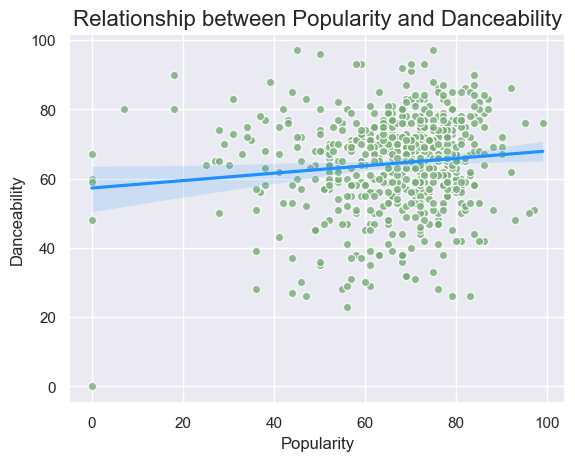

Answer:

Popularity and Danceability have a very weak positive linear correlation of 0.12.
This suggests that as one increases the other does slightly, but it is not strong enough to be a meaningful conclusion.


In [1719]:
# Calculation
sns.regplot(x='pop', y='dnce', data=all_top_songs, color='#77AA77', line_kws={'color': '#1E90FF'}, scatter_kws={'edgecolor': '#ffffff'})
correlation = all_top_songs['pop'].corr(all_top_songs['dnce'])

# Plot
plt.title("Relationship between Popularity and Danceability", fontsize=16)
plt.xlabel('Popularity', fontsize=12)
plt.ylabel('Danceability', fontsize=12)
plt.show()

# Answer
print(f"""Answer:\n\nPopularity and Danceability have a very weak positive linear correlation of {correlation:.2f}.
This suggests that as one increases the other does slightly, but it is not strong enough to be a meaningful conclusion.""")

## Question 8
Does having a higher bpm lead to having a higher energy score?

### Strategy:
- Create a scatterplot with a regression line to visualize the relationship.
- Calculate the correlation coefficient between BPM and Energy Score.

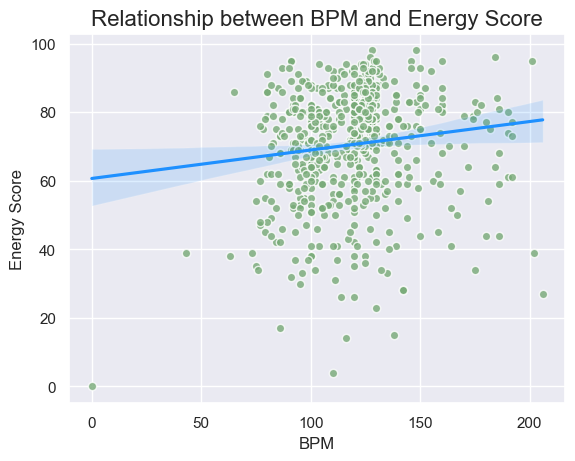

Answer:

BPM and Energy Score have a very weak positive linear correlation of 0.13.
This suggests that as one increases the other does slightly, but it is not strong 
enough to be a meaningful conclusion.


In [1720]:
# Calculation
sns.regplot(x='bpm', y='nrgy', data=all_top_songs, color='#77AA77', line_kws={'color': '#1E90FF'}, scatter_kws={'edgecolor': '#ffffff'})
correlation = all_top_songs['bpm'].corr(all_top_songs['nrgy'])

# Plot
plt.title("Relationship between BPM and Energy Score", fontsize=16)
plt.xlabel('BPM', fontsize=12)
plt.ylabel('Energy Score', fontsize=12)
plt.show()

# Answer
print(f"""Answer:\n\nBPM and Energy Score have a very weak positive linear correlation of {correlation:.2f}.
This suggests that as one increases the other does slightly, but it is not strong \nenough to be a meaningful conclusion.""")

## Question 9
Which genre has the highest energy score?

### Strategy:
- Group the genres and calculate the average energy score for eac in descending order.
- Identify the genre with the maximum average score.
- Check for ties.

In [1721]:
# Calculations
genres_energy = all_top_songs.groupby('top genre')['nrgy'].mean().sort_values(ascending=False)
highest_energy_value = genres_energy.max()
highest_energy_genres = genres_energy[genres_energy == highest_energy_value].index.tolist()

# Answer
if len(highest_energy_genres) > 1:
    print(f"\nAnswer:\n\nThe genres with the highest average energy score are {', '.join(highest_energy_genres)} with an average energy score of {highest_energy_value:.2f}")
else:
    print(f"\nAnswer:\n\nThe genre with the highest average energy score is {highest_energy_genres[0]} with an average energy score of {highest_energy_value:.2f}")


Answer:

The genre with the highest average energy score is french indie pop with an average energy score of 89.00


## Extra Credit Question 1
Export the combined dataset into a CSV called 'top_spotify_songs.csv'.

In [1722]:
all_top_songs.to_csv('data/top_spotify_songs.csv', index=False)

## Extra Credit Question 2
What percentage of songs may have been recorded live? (Consider anything above 50 in the live column to be recorded live)

### Strategy:
- Group songs into 'Likely Live' or 'Not Likely Live' based on 'live' column (>50 or ≤50).
- Calculate the count for each group.
- Calculate the rounded percentages.

In [1723]:
# Calculations
all_top_songs['is_live'] = all_top_songs['live'].apply(lambda x: 'Likely Live' if x > 50 else 'Not Likely Live')
live_counts = all_top_songs['is_live'].value_counts()
total_songs = len(all_top_songs)
live_percentages = (live_counts / total_songs * 100).round()

# Answer
print(f"\nAnswer:\n\n{int(live_percentages['Likely Live'])}% of the songs may have been recorded live.")


Answer:

3% of the songs may have been recorded live.


## Extra Credit Question 3
What percentage of songs were acoustic? (Consider anything above 50 in the acoustic column to be acoustic)

### Strategy:
- Group songs into 'Likely Acoustic' or 'Not Likely Acoustic' based on 'acous' column (>50 or ≤50).
- Calculate the count for each group.
- Calculate the rounded percentages.

In [1724]:
# Calculations
all_top_songs['is_acoustic'] = all_top_songs['acous'].apply(lambda x: 'Likely Acoustic' if x > 50 else 'Not Likely Acoustic')
acoustic_counts = all_top_songs['is_acoustic'].value_counts()
total_songs = len(all_top_songs)
acoustic_percentages = (acoustic_counts / total_songs * 100).round()

# Answer
print(f"\nAnswer:\n\n{int(acoustic_percentages['Likely Acoustic'])}% of the songs were acoustic.")


Answer:

7% of the songs were acoustic.


## Extra Credit Question 4
Which year’s songs have the highest amount of spoken word in the song?

### Strategy:
- Group by year and calculate the average number of spoken words, rounded to 2 decimals.
- Identify years with the maximum average and check for ties.

In [1725]:
# Calculation
average_words_by_year = all_top_songs.groupby('year')['spch'].mean().round(2)
max_words_value = average_words_by_year.max()
max_words_years = average_words_by_year[average_words_by_year == max_words_value].index.tolist()

# Answer
if len(max_words_years) > 1:
    print(f"\nAnswer:\n\nThe years with the highest average spoken words in the songs are {', '.join([str(year) for year in max_words_years])} with an average of {max_words_value} words per song.")
else:
    print(f"\nAnswer:\n\nThe year with the highest average spoken words in the songs is {max_words_years[0]} with an average of {max_words_value} words per song.")


Answer:

The year with the highest average spoken words in the songs is 2017 with an average of 9.78 words per song.
